Projeto da Disciplina de Introdução à Análise de Dados - Professor Luciano Barbosa<br>
Grupo:<br>
Arianne Macena<br>
Otávio Kamel

# Importação

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# Descrição dos Dados

In [2]:
df = pd.read_csv('metal_bands_2017.csv')

In [3]:
df.head()

,Unnamed: 0,band_name,fans,formed,origin,split,style
0,0,Iron Maiden,4195,1975,United Kingdom,-,"New wave of british heavy,Heavy"
1,1,Opeth,4147,1990,Sweden,1990,"Extreme progressive,Progressive rock,Progressive"
2,2,Metallica,3712,1981,USA,-,"Heavy,Bay area thrash"
3,3,Megadeth,3105,1983,USA,1983,"Thrash,Heavy,Hard rock"
4,4,Amon Amarth,3054,1988,Sweden,-,Melodic death


In [4]:
df.shape

(5000, 7)

In [39]:
df.dtypes

Unnamed: 0     int64
band_name     object
fans           int64
formed        object
origin        object
split         object
style         object
dtype: object

In [41]:
df['formed'].astype('int64')

ValueError: invalid literal for int() with base 10: '-'

In [5]:
df.isna().sum()

Unnamed: 0    0
band_name     0
fans          0
formed        0
origin        8
split         0
style         0
dtype: int64

In [6]:
df[df['origin'].isna()]

,Unnamed: 0,band_name,fans,formed,origin,split,style
460,460,Enshine,175,2009,NaN,-,Gothic doom
989,989,Clouds,61,2013,NaN,2013,Atmospheric doom
1422,1422,Subterranean Masquerade,35,1997,NaN,-,"Progressive,Psychedelic rock"
2614,2614,Twilight Of The Gods,11,2010,NaN,-,Heavy
2996,2996,Archivist,7,2015,NaN,-,"Atmospheric black,Post-metal"
3444,3444,Metallic Taste Of Blood,5,2011,NaN,-,"Progressive,Instrumental"
3941,3941,Level 10,3,2014,NaN,2014,"Heavy,Power"
4201,4201,Death Penalty,2,2013,NaN,2013,"Doom,Heavy"


In [7]:
df.describe()

,Unnamed: 0,fans
count,5000.000000,5000.000000
mean,2499.500000,87.805800
std,1443.520003,296.137523
min,0.000000,0.000000
25%,1249.750000,4.000000
50%,2499.500000,12.000000
75%,3749.250000,42.000000
max,4999.000000,4195.000000


# Pré-Processamento

## Análises

In [13]:
df_fans_by_country = df[['origin', 'fans']].groupby('origin').mean().reset_index().sort_values('fans', ascending=False)
df_fans_by_country

,origin,fans
28,"Denmark, USA",583.000000
111,"United Kingdom, USA",561.333333
54,"Israel, The Netherlands",307.000000
1,Andorra,279.000000
102,"Tunisia, France",275.000000
...,...,...
0,Albania,2.000000
56,"Italy, Spain",1.000000
81,"Poland, Sweden",1.000000
112,Venezuela,1.000000


# Gráficos

In [ ]:
#pallete = ['Blue', 'Pink']

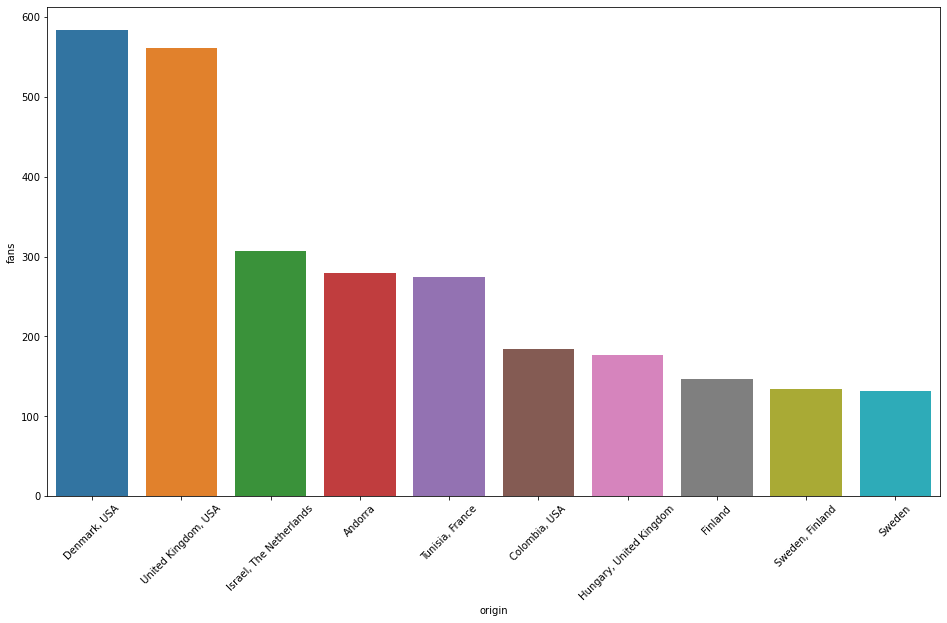

In [14]:
plt.figure(figsize=(16,9))
plt.xticks(rotation=45)
sns.barplot(data=df_fans_by_country.head(10), x='origin', y='fans');

In [31]:
most_countries = df['origin'].value_counts()
most_countries

USA                        1139
Sweden                      476
Germany                     397
United Kingdom              345
Finland                     307
                           ... 
Israel, The Netherlands       1
Swaziland                     1
Ecuador                       1
Israel, Germany               1
Italy, Spain                  1
Name: origin, Length: 113, dtype: int64

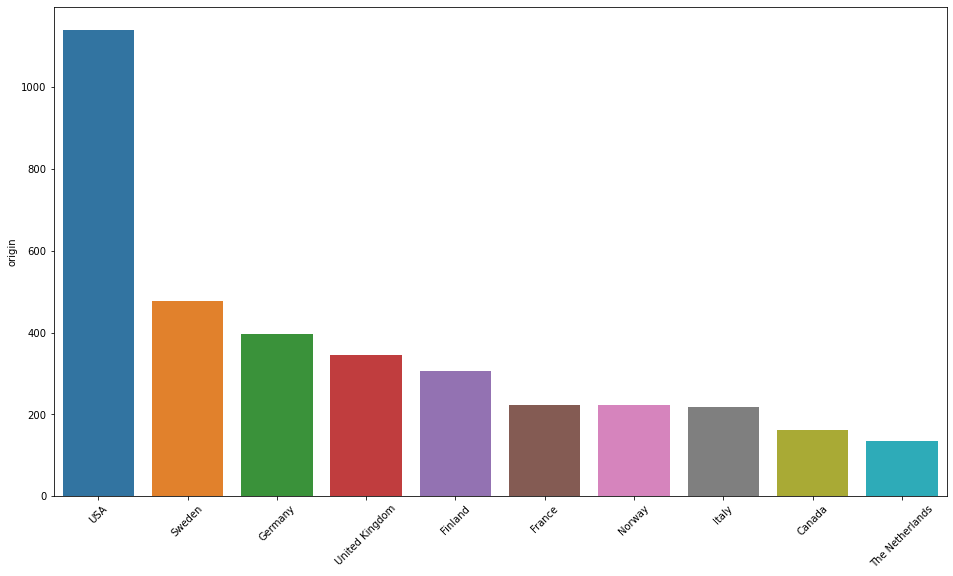

In [37]:
plt.figure(figsize=(16,9))
plt.xticks(rotation=45)
sns.barplot(x=most_countries.index[:10], y=most_countries[:10]);